In [2]:
import pandas as pd
import os

import warnings
warnings.filterwarnings("ignore")

In [3]:
root_path = 'D:/vscode_files/python/notebooks/karpov_course/python/3_pandas_hard/'

df_list = []

for date in os.listdir(root_path):
    if date.startswith('4_'):
        continue
    if date.startswith('mini'):
        continue
    if date.startswith('selected'):
        continue
    for name in os.listdir(root_path + date):
        file_path = f'{root_path}{date}/{name}/data.csv'
        t_df = pd.read_csv(file_path, sep = ',', index_col = 0)
        t_df['name'], t_df['date'] = name, date
        df_list.append(t_df)
df = pd.concat(df_list).reset_index().drop(columns='index')
df.head()

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03


In [4]:
quantity_bought=df.groupby('name').quantity.sum()
max_quantity=quantity_bought.max()
max_quantity

np.int64(52)

In [5]:
quantity_bought.loc[quantity_bought==max_quantity].index.sort_values()

Index(['Alexey_Smirnov', 'Petr_Smirnov'], dtype='object', name='name')

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
products_sold = df.groupby('product_id', as_index=False).quantity.sum()
products_sold.head()

,product_id,quantity
0,0,4
1,1,4
2,3,8
3,4,6
4,6,10


In [8]:
products_sold = products_sold.sort_values('quantity', ascending=False).head(10)
products_sold

,product_id,quantity
22,27,20
42,56,18
51,74,15
21,24,15
32,41,14
46,66,13
66,94,13
27,34,13
38,50,12
65,92,12


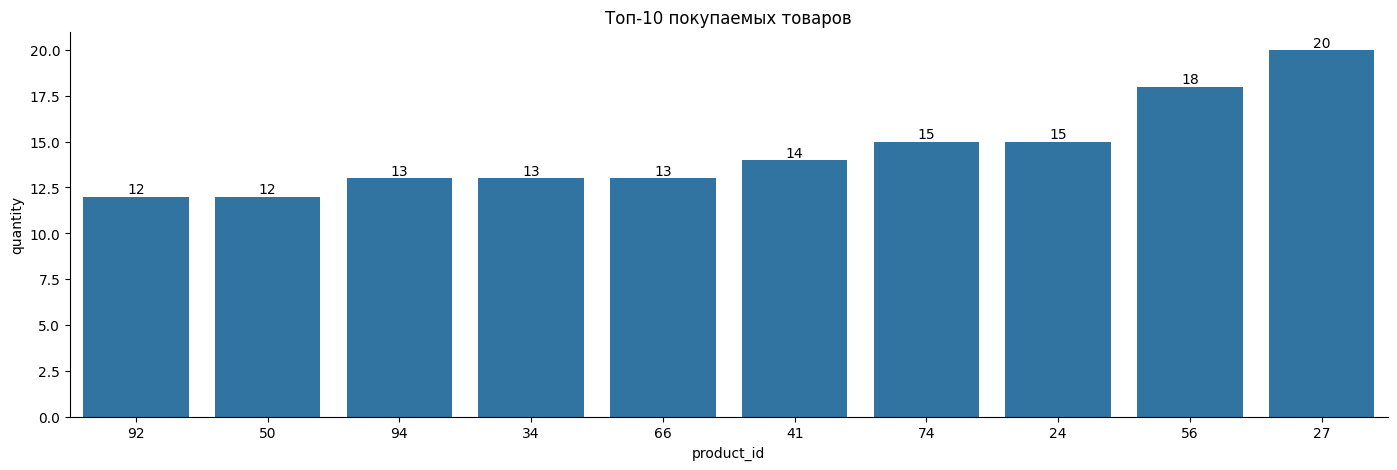

In [18]:
fig, ax = plt.subplots(figsize=(17,5))
sns.barplot(data=products_sold, x='product_id', y='quantity',
            order=products_sold.sort_values('quantity').product_id)
ax.bar_label(ax.containers[0])
ax.set_title('Топ-10 покупаемых товаров')
sns.despine()

In [19]:
products_sold.query('product_id==56')

,product_id,quantity
42,56,18


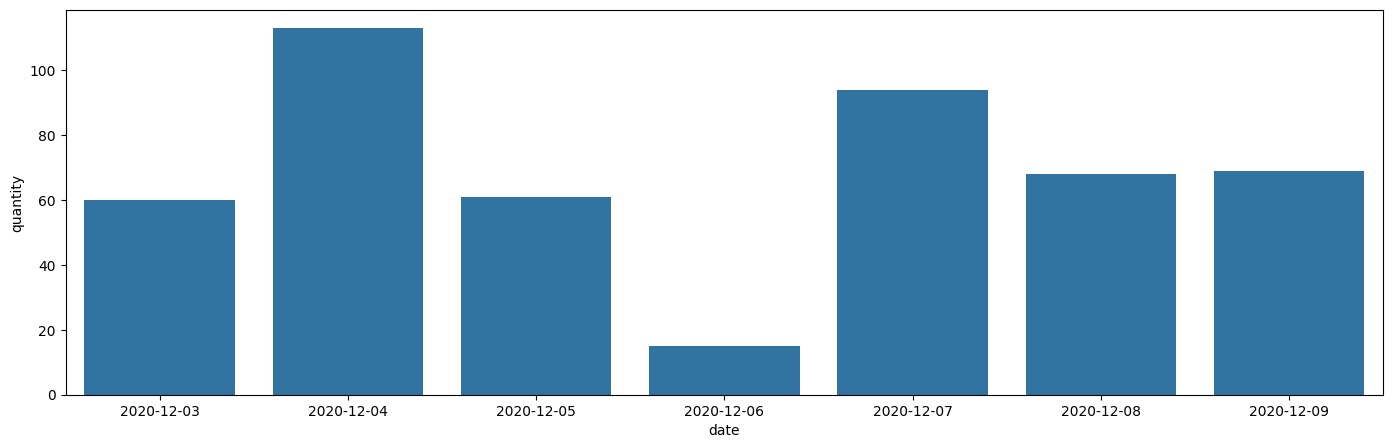

In [20]:
quantity_by_date = (df.groupby('date', as_index=False)
                     .agg({'quantity' : 'sum'}) 
                     .sort_values('quantity', ascending=False))
fig, ax = plt.subplots(figsize=(17,5))
ax = sns.barplot(x='date', y='quantity',order=['2020-12-03',
                                               '2020-12-04', 
                                               '2020-12-05', 
                                               '2020-12-06', 
                                               '2020-12-07', 
                                               '2020-12-08', 
                                               '2020-12-09'], 
                 data=quantity_by_date)


In [21]:
unique_purchases = df.drop_duplicates(subset=['name', 'product_id', 'date'])

In [22]:
same_product = unique_purchases.groupby(['name', 'product_id'], as_index=False).agg({'date':'count'}).sort_values(by='date',ascending=False)
#same_product = df.groupby(['name', 'product_id']).date.nunique().sort_values(ascending=False)
#same_product

In [23]:
same_product

,name,product_id,date
92,Petr_Fedorov,94,2
37,Anton_Ivanov,15,2
2,Alexey_Fedorov,18,1
3,Alexey_Fedorov,34,1
0,Alexey_Fedorov,13,1
...,...,...,...
153,Vasiliy_Ivanov,83,1
154,Vasiliy_Ivanov,94,1
155,Vasiliy_Ivanov,95,1
156,Vasiliy_Petrov,27,1


In [24]:
same_product.query('date > 1')

,name,product_id,date
92,Petr_Fedorov,94,2
37,Anton_Ivanov,15,2
